# Importações e primeiras informações

Para melhor exposição das informações, troquei as configurações do display. Seaborn será usado somente para elaboração de gráficos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sharks = pd.read_csv('data/attacks.csv', encoding='latin-1')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

# Primeira Análise

Aqui, usei os principais métodos para uma análise exploratória primária dos dados. Algumas foram mais significativas do que outras, que acrescentaram pouco.

## Info

In [2]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Análise breve: Vemos que, apesar dos 25 mil registros, em geral somente cerca de 6000 tem dados não nulos. Também vemos que há algumas colunas de nome suspeito: duas colunas 'href', três 'Case Number', uma 'original order' e duas 'Unnamed'.

## Columns

In [3]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## DTypes

In [4]:
sharks.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
dtype: object

In [5]:
sharks.dtypes.value_counts()

object     22
float64     2
dtype: int64

In [6]:
sharks.select_dtypes(include='object')

,Case Number,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,NaN,NaN
1,2018.06.18,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,NaN,NaN
2,2018.06.09,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,NaN,NaN
3,2018.06.08,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,NaN,NaN
4,2018.06.04,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sharks.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             8702 non-null   object
 1   Date                    6302 non-null   object
 2   Type                    6298 non-null   object
 3   Country                 6252 non-null   object
 4   Area                    5847 non-null   object
 5   Location                5762 non-null   object
 6   Activity                5758 non-null   object
 7   Name                    6092 non-null   object
 8   Sex                     5737 non-null   object
 9   Age                     3471 non-null   object
 10  Injury                  6274 non-null   object
 11  Fatal (Y/N)             5763 non-null   object
 12  Time                    2948 non-null   object
 13  Species                 3464 non-null   object
 14  Investigator or Source  6285 non-null   object
 15  pd

## Describe

In [8]:
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


## Head

In [9]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


## Tail

In [10]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 With these preliminary data, we already know a lot about what needs to be cleaned. For example:
 - There are 25722 records, but most of its columns have only 6000 records; the tail method reveals that the last records are all NaN
 - There are columns that need to be dropped for lack of relevant information (or any information at all): The two 'unnamed' ones and probably the Case Number.1 and Case Number.2, which are duplicates of Case Number (which is more complete).
 - Most of the columns are of 'object' type, which means that some numeric columns are not correctly typed.
 - The columns 'Sex' and 'Species' have a space in its names.
 - The column 'Date' seems to be a duplicate of the Case Number column.
 - There are two columns of 'href', which leads to the question: why? Are they the same?
 - There are more-less 6302 records with more information, and some columns have a lot of missing information, like 'species' and 'time'
 - Why the min year is 0? We have records of 2023 years old? Probably, it's a NaN!

## Value counts:

In [11]:
for column in sharks.columns:
    print('=' * 75)
    print(f'Column name: {column.upper()}  --------  Nº of Registers: {len(sharks[sharks[column].notna()])}')
    print('=' * 75)
    print(sharks[column].value_counts())
    print('-' * 75)
    print('Unique records:')
    print('-' * 75)
    print(sharks[column].unique())
    print()

Column name: CASE NUMBER  --------  Nº of Registers: 8702
0               2400
1920.00.00.b       2
1966.12.26         2
2014.08.02         2
1990.05.10         2
                ... 
1999.09.05         1
1999.09.10         1
1999.09.16         1
1999.09.18         1
xx                 1
Name: Case Number, Length: 6287, dtype: int64
---------------------------------------------------------------------------
Unique records:
---------------------------------------------------------------------------
['2018.06.25' '2018.06.18' '2018.06.09' ... 'ND.0001' '0' 'xx']

Column name: DATE  --------  Nº of Registers: 6302
1957                          11
1942                           9
1956                           8
1958                           7
1950                           7
                              ..
01-Dec-1994                    1
Reported      10-Dec-1994      1
11-Dec-1994                    1
13-Dec-1994                    1
1845-1853                      1
Name: Date, Length

Column name: PDF  --------  Nº of Registers: 6302
1923.00.00.a-NJ fisherman.pdf      2
1935.06.05.R-SolomonIslands.pdf    2
1916.12.08.a-b-German.pdf          2
1907.10.16.R-HongKong.pdf          2
1921.11.27.a-b-Jack.pdf            2
                                  ..
1999.10.30.a-TroyJesse.pdf         1
1999.10.30.b-Dolsky.pdf            1
1999.11.00.a-Morson.pdf            1
1999.11.00.b-Bayo.pdf              1
ND-0001-Ceylon.pdf                 1
Name: pdf, Length: 6291, dtype: int64
---------------------------------------------------------------------------
Unique records:
---------------------------------------------------------------------------
['2018.06.25-Wolfe.pdf' '2018.06.18-McNeely.pdf' '2018.06.09-Denges.pdf'
 ... 'ND-0002-JulesPatterson.pdf' 'ND-0001-Ceylon.pdf' nan]

Column name: HREF FORMULA  --------  Nº of Registers: 6301
http://sharkattackfile.net/spreadsheets/pdf_directory/1923.00.00.a-NJ fisherman.pdf      2
http://sharkattackfile.net/spreadsheets/pdf_directory

# Data Cleaning

In [12]:
# Resumo
#sharks = sharks.rename({'Sex ': 'Sex', 'Species ': 'Species'}, axis=1)
#sharks = sharks.drop(['Case Number.1', 'Case Number.2'], axis=1)
#sharks = sharks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)
#sharks = sharks.drop('original order', axis=1)
#sharks = sharks.drop(['href', 'href formula', 'pdf'], axis=1)
#sharks = sharks.dropna(subset='Case Number', axis=0)
#sharks = sharks.drop(sharks[sharks['Case Number'] == 'xx'].index)
#sharks = sharks.drop(sharks[sharks['Case Number'] == '0'].index)

## Renaming Columns

In [13]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [14]:
sharks = sharks.rename({'Sex ': 'Sex', 'Species ': 'Species'}, axis=1)

In [15]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Dropping columns

### Case Number duplicada

In [16]:
sharks['Case Number'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25723 entries, 0 to 25722
Series name: Case Number
Non-Null Count  Dtype 
--------------  ----- 
8702 non-null   object
dtypes: object(1)
memory usage: 201.1+ KB


In [17]:
sum(sharks['Case Number'] == sharks['Case Number.1'])

6278

In [18]:
sum(sharks['Case Number'] == sharks['Case Number.2'])

6298

In [19]:
sharks[sharks['Case Number'] != sharks['Case Number.1']][['Case Number', 'Case Number.1', 'Case Number.2']]

,Case Number,Case Number.1,Case Number.2
34,2018.04.03,2018.04.02,2018.04.03
117,2017.07.20.a,2017/07.20.a,2017.07.20.a
144,2017.05.06,2017.06.06,2017.05.06
217,2016.09.15,2016.09.16,2016.09.15
314,2016.01.24.b,2015.01.24.b,2016.01.24.b
...,...,...,...
25718,NaN,NaN,NaN
25719,NaN,NaN,NaN
25720,NaN,NaN,NaN
25721,NaN,NaN,NaN


As colunas são basicamente iguais, em geral com diferenças de formatação, acréscimos que não se mantém iguais (um 'a' no final) ou, em alguns casos, um dado ligeiramente diferente (dia 6 em vez de 5); no geral, acho que vale a pena eliminar as colunas extras.

In [20]:
sharks = sharks.drop(['Case Number.1', 'Case Number.2'], axis=1)

In [21]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,NaN,NaN


### Unnamed Columns

In [22]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [23]:
sharks['Unnamed: 22'].value_counts()

stopped here    1
Name: Unnamed: 22, dtype: int64

In [24]:
sharks['Unnamed: 23'].value_counts()

Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64

Dados inúteis à análise, eliminá-los

In [25]:
sharks = sharks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

In [26]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'original order'],
      dtype='object')

### Column Original Order

In [27]:
sharks.sort_values(by='original order', ascending=True)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Parece ser basicamente o index invertido, com alguns problemas. Eu poderia simplesmente estabelecê-la como index, preservando a ordem original, mas não acredito que isso seja útil para a minha análise porque, para ver uma progressão no tempo, melhor fazer uso da data. Assim, vou excluí-la.

In [28]:
sharks = sharks.drop('original order', axis=1)

In [29]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href'],
      dtype='object')

### hrefs e pdf

In [30]:
sum(sharks['href formula'] == sharks['href'])

6242

In [31]:
sharks['href formula'].count()

6301

Apesar de não ser estritamente a mesma quantidade, dá para se considerar que é basicamente igual. Como não é, a princípio, algo que eu queira me deter na análise, mais fácil eliminar também. Pelo mesmo motivo, eliminarei o 'pdf'.

In [32]:
sharks = sharks.drop(['href', 'href formula', 'pdf'], axis=1)

In [33]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping rows

In [34]:
sharks = sharks.dropna(subset='Case Number', axis=0)

In [35]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
sharks = sharks.drop(sharks[sharks['Case Number'] == 'xx'].index)
sharks = sharks.drop(sharks[sharks['Case Number'] == '0'].index)

In [37]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


## Type correction

Numeric columns should be:
- Year (already ok)
- Age
- original order (already ok)

### Age

In [38]:
sharks['Age'].head(20)

0      57
1      11
2      48
3     NaN
4     NaN
5     NaN
6      18
7      52
8      15
9      12
10     32
11     10
12     10
13     21
14     34
15    NaN
16    NaN
17    NaN
18     30
19    NaN
Name: Age, dtype: object

In [39]:
sharks['Age'].value_counts()

17                154
18                150
19                142
20                141
15                139
                 ... 
20?                 1
 28                 1
7      &    31      1
 30                 1
13 or 14            1
Name: Age, Length: 157, dtype: int64

In [40]:
sharks['Age'].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

Alright, this is a problem. I shall think if I drop the text records or if I just give up, losing important information. Maybe there is some way to only calculate the numeric data? Maybe a function called by map()?

In [41]:
def convert_age(age):
    try:
        return int(age)
    except:
        return np.nan

In [42]:
sharks['Age'].map(convert_age).mean()

27.36835856337192

In [43]:
sharks['Age'].map(convert_age).describe()

count    3369.000000
mean       27.368359
std        13.907779
min         1.000000
25%        17.000000
50%        24.000000
75%        35.000000
max        87.000000
Name: Age, dtype: float64

It works!

## NaN analysis, filling or dropping

In [44]:
sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source'],
      dtype='object')

In [45]:
sharks.loc[187, 'Year'] = 2017

In [46]:
sharks.loc[6079, 'Year'] = 1836

In [47]:
sharks[sharks['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source


## Duplicates?

In [48]:
sum(sharks.duplicated())

0

Sem duplicatas estritamente falando

# Analysing the Data Again

In [49]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6301 entries, 0 to 6301
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6301 non-null   object 
 2   Year                    6301 non-null   float64
 3   Type                    6297 non-null   object 
 4   Country                 6251 non-null   object 
 5   Area                    5846 non-null   object 
 6   Location                5761 non-null   object 
 7   Activity                5757 non-null   object 
 8   Name                    6091 non-null   object 
 9   Sex                     5736 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6273 non-null   object 
 12  Fatal (Y/N)             5762 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [50]:
sharks.describe()

,Year
count,6301.000000
mean,1927.275671
std,281.098482
min,0.000000
25%,1942.000000
50%,1977.000000
75%,2005.000000
max,2018.000000


The year '0' means that the date is uncertain

In [51]:
sharks[sharks['Year'] == sharks['Year'].min()]['Date'].value_counts()

No date                 6
No date, Before 1963    5
Before 1906             4
Before 1958             4
1940 - 1950             3
                       ..
Before 2006             1
No date, late 1960s     1
Before 1901             1
Before 08-Jun-1912      1
1845-1853               1
Name: Date, Length: 87, dtype: int64

In [52]:
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper


In [53]:
sharks.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,NaN,NaN,S.W. Baker


### Análise de localização

In [54]:
sharks.groupby('Country').count().sort_values(by='Case Number', ascending=False)

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
Country,,,,,,,,,,,,,,,
USA,2228,2228,2228,2228,2224,2177,2094,2198,2130,1502,2223,2040,1384,1323,2221
AUSTRALIA,1338,1338,1338,1337,1324,1294,1215,1319,1197,724,1332,1225,596,792,1336
SOUTH AFRICA,579,579,579,579,574,571,535,566,515,366,578,515,349,420,577
PAPUA NEW GUINEA,134,134,134,134,128,121,112,128,115,47,134,132,23,42,134
NEW ZEALAND,128,128,128,128,125,124,120,125,113,49,126,116,47,78,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GUATEMALA,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1
GREENLAND,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1
GRAND CAYMAN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [55]:
sharks_usa = sharks[sharks['Country'] == 'USA']

In [56]:
sharks_usa['Area'].value_counts()

Florida                   1036
Hawaii                     298
California                 290
South Carolina             159
North Carolina             101
Texas                       73
New Jersey                  52
New York                    30
Oregon                      29
Virginia                    19
Massachusetts               16
Puerto Rico                 16
Alabama                     15
Georgia                     14
Louisiana                   11
Maryland                     7
Delaware                     7
Rhode Island                 7
Connecticut                  6
Mississippi                  5
US Virgin Islands            5
New York                     3
North Carolina               2
Palmyra Atoll                2
East coast                   2
Washington                   2
Midway Atoll                 1
 North Carolina              1
Wake Island                  1
Illinois                     1
 New Jersey                  1
Pennsylvania                 1
Kentucky

In [57]:
sharks_usa_florida = sharks_usa[sharks_usa['Area'] == 'Florida']

In [58]:
sharks_usa_florida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 7 to 6283
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             1036 non-null   object 
 1   Date                    1036 non-null   object 
 2   Year                    1036 non-null   float64
 3   Type                    1036 non-null   object 
 4   Country                 1036 non-null   object 
 5   Area                    1036 non-null   object 
 6   Location                1024 non-null   object 
 7   Activity                973 non-null    object 
 8   Name                    1023 non-null   object 
 9   Sex                     1002 non-null   object 
 10  Age                     818 non-null    object 
 11  Injury                  1033 non-null   object 
 12  Fatal (Y/N)             970 non-null    object 
 13  Time                    719 non-null    object 
 14  Species                 560 non-null    

In [59]:
sharks_usa_florida['Location'].value_counts()

New Smyrna Beach, Volusia County                      163
Daytona Beach, Volusia County                          30
Ponce Inlet, Volusia County                            20
Melbourne Beach, Brevard County                        18
Cocoa Beach, Brevard County                            12
                                                     ... 
Sunglow Pier, Daytona Beach Shores, Volusia County      1
Shepard Park, Cocoa Beach, Brevard County               1
Melbourne Beach, Brevard County                         1
Coral Cove Park, Jupiter Inlet, Palm Beach County       1
Mosquito Inlet (Ponce Inlet), Volusia County            1
Name: Location, Length: 506, dtype: int64

In [60]:
sharks_usa_florida_new_smyrna = sharks_usa_florida[sharks_usa_florida['Location'] == 'New Smyrna Beach, Volusia County']

In [61]:
mask_volusia = sharks_usa_florida['Location'].map(lambda x: str(x).endswith('Volusia County'))
sharks_usa_volusia_county = sharks_usa_florida[mask_volusia]

In [62]:
sharks_usa_volusia_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 7 to 6233
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             301 non-null    object 
 1   Date                    301 non-null    object 
 2   Year                    301 non-null    float64
 3   Type                    301 non-null    object 
 4   Country                 301 non-null    object 
 5   Area                    301 non-null    object 
 6   Location                301 non-null    object 
 7   Activity                292 non-null    object 
 8   Name                    296 non-null    object 
 9   Sex                     291 non-null    object 
 10  Age                     287 non-null    object 
 11  Injury                  301 non-null    object 
 12  Fatal (Y/N)             296 non-null    object 
 13  Time                    271 non-null    object 
 14  Species                 132 non-null    o

In [63]:
sharks_usa_volusia_county.select_dtypes('object').describe().T

,count,unique,top,freq
Case Number,301,301,2018.05.27,1
Date,301,267,28-Jul-1995,4
Type,301,3,Unprovoked,283
Country,301,1,USA,301
Area,301,1,Florida,301
Location,301,48,"New Smyrna Beach, Volusia County",163
Activity,292,47,Surfing,172
Name,296,248,male,37
Sex,291,2,M,248
Age,287,58,18,22


# Analysing Hypothesis

What are the greatest mortality rates by country?

In [64]:
sharks['Fatality'] = sharks['Fatal (Y/N)'].map(lambda x:1 if x=='Y' else 0)

In [65]:
mask_usa_australia = (sharks['Country'] == 'USA') | (sharks['Country'] == 'AUSTRALIA')
sharks_loc_usa_australia = sharks[mask_usa_australia].copy()

Em toda a história de registros, há 2228 casos nos EUA e 1338 na Austrália.

In [66]:
sharks_loc_usa_australia['Country'].value_counts()

USA          2228
AUSTRALIA    1338
Name: Country, dtype: int64

O dataframe abaixo mostra todos os anos para cada um dos países com registros de ataques de tubarão.

Obs.: cabe limpeza, já que o ano zero é claramente errado.

In [67]:
sharks_usa_australia_year = sharks_loc_usa_australia.groupby(['Country', 'Year'])['Fatality'].agg(fatal_cases = 'sum', total_cases = 'count').reset_index()
sharks_usa_australia_year

,Country,Year,fatal_cases,total_cases
0,AUSTRALIA,0.0,8,16
1,AUSTRALIA,5.0,0,1
2,AUSTRALIA,1788.0,0,1
3,AUSTRALIA,1791.0,1,1
4,AUSTRALIA,1803.0,0,1
...,...,...,...,...
357,USA,2014.0,0,66
358,USA,2015.0,1,73
359,USA,2016.0,0,64
360,USA,2017.0,0,65


In [68]:
sharks_usa_australia_year['fatality_rate'] = sharks_usa_australia_year['fatal_cases'] / sharks_usa_australia_year['total_cases']

In [69]:
sharks_usa_australia_year

,Country,Year,fatal_cases,total_cases,fatality_rate
0,AUSTRALIA,0.0,8,16,0.500000
1,AUSTRALIA,5.0,0,1,0.000000
2,AUSTRALIA,1788.0,0,1,0.000000
3,AUSTRALIA,1791.0,1,1,1.000000
4,AUSTRALIA,1803.0,0,1,0.000000
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


Uma primeira facilitação de análise é excluir um certo intervalo de registros.

In [70]:
sharks_usa_australia_year_1900 = sharks_usa_australia_year[sharks_usa_australia_year['Year'] > 1900]
sharks_usa_australia_year_1900

,Country,Year,fatal_cases,total_cases,fatality_rate
64,AUSTRALIA,1901.0,1,2,0.500000
65,AUSTRALIA,1902.0,2,3,0.666667
66,AUSTRALIA,1903.0,4,4,1.000000
67,AUSTRALIA,1904.0,1,1,1.000000
68,AUSTRALIA,1905.0,1,6,0.166667
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


<Axes: xlabel='Year', ylabel='fatal_cases'>

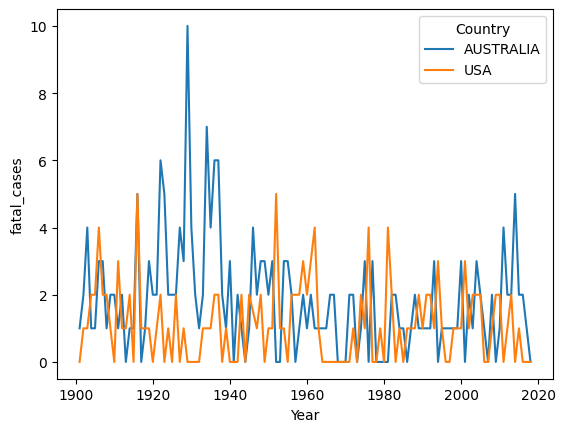

In [71]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='fatal_cases', hue='Country')

<Axes: xlabel='Year', ylabel='total_cases'>

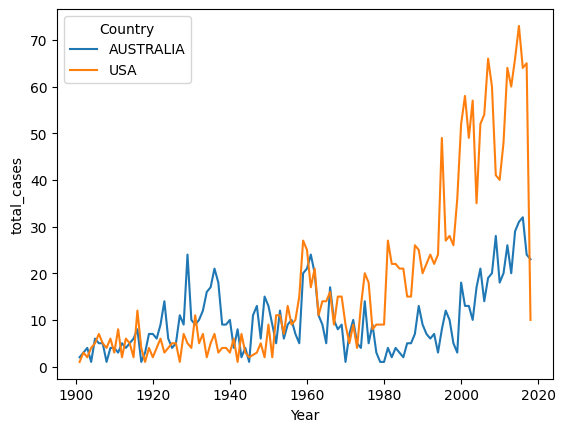

In [72]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='total_cases', hue='Country')

<Axes: xlabel='Year', ylabel='fatality_rate'>

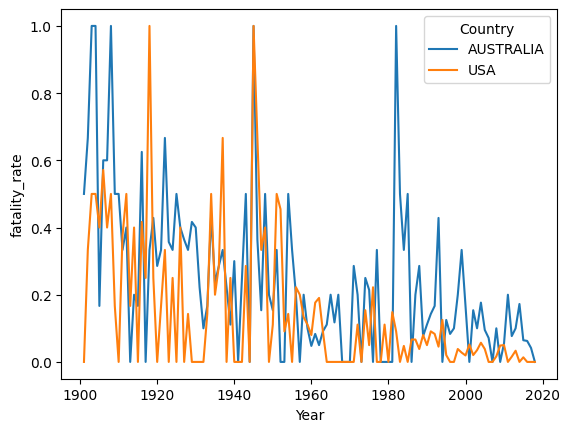

In [73]:
sns.lineplot(data=sharks_usa_australia_year_1900, x='Year', y='fatality_rate', hue='Country')

O gráfico abaixo mostra que há uma quantidade muito maior de registros dos USA a partir da década de 80, sempre tendendo ao crescimento. O número da Austrália cresce também, mas a quantidade total é sempre menor. Isso não necessariamente reflete um menor número de ataques de tubarão, mas um menor número de registros de ataques de tubarão. 

In [74]:
sharks_usa_australia_year_1900

,Country,Year,fatal_cases,total_cases,fatality_rate
64,AUSTRALIA,1901.0,1,2,0.500000
65,AUSTRALIA,1902.0,2,3,0.666667
66,AUSTRALIA,1903.0,4,4,1.000000
67,AUSTRALIA,1904.0,1,1,1.000000
68,AUSTRALIA,1905.0,1,6,0.166667
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


In [75]:
sharks_usa_australia_year_1960 = sharks_usa_australia_year[sharks_usa_australia_year['Year'] > 1960]
sharks_usa_australia_year_1960

,Country,Year,fatal_cases,total_cases,fatality_rate
124,AUSTRALIA,1961.0,2,24,0.083333
125,AUSTRALIA,1962.0,1,20,0.050000
126,AUSTRALIA,1963.0,1,11,0.090909
127,AUSTRALIA,1964.0,1,9,0.111111
128,AUSTRALIA,1965.0,1,5,0.200000
...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000
358,USA,2015.0,1,73,0.013699
359,USA,2016.0,0,64,0.000000
360,USA,2017.0,0,65,0.000000


In [76]:
sharks_usa_australia_year_1960.groupby('Country').mean()

,Year,fatal_cases,total_cases,fatality_rate
Country,,,,
AUSTRALIA,1989.5,1.293103,11.793103,0.144145
USA,1989.5,1.051724,29.844828,0.043554


Mais de 3x fatality rate média!

In [77]:
mask_dec_60 = (sharks_usa_australia_year_1960['Year'] >= 1960) & (sharks_usa_australia_year_1960['Year'] < 1970)
mask_dec_70 = (sharks_usa_australia_year_1960['Year'] >= 1970) & (sharks_usa_australia_year_1960['Year'] < 1980)
mask_dec_80 = (sharks_usa_australia_year_1960['Year'] >= 1980) & (sharks_usa_australia_year_1960['Year'] < 1990)
mask_dec_90 = (sharks_usa_australia_year_1960['Year'] >= 1990) & (sharks_usa_australia_year_1960['Year'] < 2000)
mask_dec_2000 = (sharks_usa_australia_year_1960['Year'] >= 2000) & (sharks_usa_australia_year_1960['Year'] < 2010)
mask_dec_2010 = (sharks_usa_australia_year_1960['Year'] >= 2010) & (sharks_usa_australia_year_1960['Year'] < 2020)

sharks_usa_australia_year_1960[mask_dec_60].groupby('Country')['fatality_rate'].mean()

Country
AUSTRALIA    0.094778
USA          0.050873
Name: fatality_rate, dtype: float64

In [78]:
sharks_decade_variation = pd.DataFrame(
    [sharks_usa_australia_year_1960[mask_dec_60].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_70].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_80].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_90].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_2000].groupby('Country')['fatality_rate'].mean(),
    sharks_usa_australia_year_1960[mask_dec_2010].groupby('Country')['fatality_rate'].mean(),
    ], index=['60s', '70s', '80s', '90s', '2000s', '2010s']
)

sharks_decade_variation

Country,AUSTRALIA,USA
60s,0.094778,0.050873
70s,0.128333,0.064829
80s,0.289597,0.053847
90s,0.169087,0.048134
2000s,0.086365,0.028750
2010s,0.085953,0.012517


<Axes: >

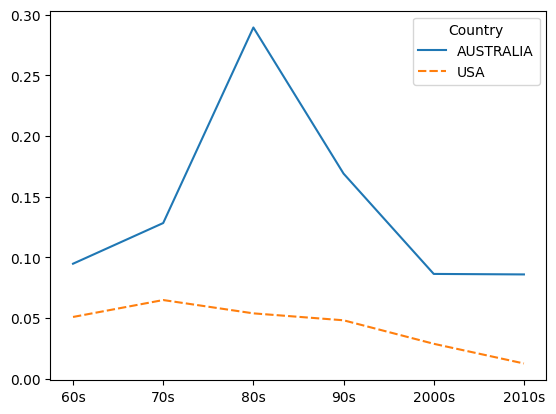

In [79]:
sns.lineplot(data=sharks_decade_variation)

In [80]:
sharks_usa_australia_year_1960['Decade'] = pd.cut(sharks_usa_australia_year_1960['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020])

C:\Users\alexa\AppData\Local\Temp\ipykernel_27500\3088559541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa_australia_year_1960['Decade'] = pd.cut(sharks_usa_australia_year_1960['Year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2020])


In [81]:
decades_fatality_stats = sharks_usa_australia_year_1960.groupby(['Country', 'Decade']).agg(total_cases=('total_cases', 'sum'), fatal_cases=('fatal_cases', 'sum')).reset_index()

In [82]:
decades_fatality_stats

,Country,Decade,total_cases,fatal_cases
0,AUSTRALIA,"(1960, 1970]",114,10
1,AUSTRALIA,"(1970, 1980]",59,11
2,AUSTRALIA,"(1980, 1990]",54,11
3,AUSTRALIA,"(1990, 2000]",79,13
4,AUSTRALIA,"(2000, 2010]",173,12
5,AUSTRALIA,"(2010, 2020]",205,18
6,USA,"(1960, 1970]",141,8
7,USA,"(1970, 1980]",104,9
8,USA,"(1980, 1990]",214,13
9,USA,"(1990, 2000]",310,12


In [83]:
decades_fatality_stats['mean'] = decades_fatality_stats['fatal_cases'] / decades_fatality_stats['total_cases']

In [84]:
decades_fatality_stats

,Country,Decade,total_cases,fatal_cases,mean
0,AUSTRALIA,"(1960, 1970]",114,10,0.087719
1,AUSTRALIA,"(1970, 1980]",59,11,0.186441
2,AUSTRALIA,"(1980, 1990]",54,11,0.203704
3,AUSTRALIA,"(1990, 2000]",79,13,0.164557
4,AUSTRALIA,"(2000, 2010]",173,12,0.069364
5,AUSTRALIA,"(2010, 2020]",205,18,0.087805
6,USA,"(1960, 1970]",141,8,0.056738
7,USA,"(1970, 1980]",104,9,0.086538
8,USA,"(1980, 1990]",214,13,0.060748
9,USA,"(1990, 2000]",310,12,0.038710


In [85]:
decades_fatality_stats.sort_values(by='Decade')

,Country,Decade,total_cases,fatal_cases,mean
0,AUSTRALIA,"(1960, 1970]",114,10,0.087719
6,USA,"(1960, 1970]",141,8,0.056738
1,AUSTRALIA,"(1970, 1980]",59,11,0.186441
7,USA,"(1970, 1980]",104,9,0.086538
2,AUSTRALIA,"(1980, 1990]",54,11,0.203704
8,USA,"(1980, 1990]",214,13,0.060748
3,AUSTRALIA,"(1990, 2000]",79,13,0.164557
9,USA,"(1990, 2000]",310,12,0.038710
4,AUSTRALIA,"(2000, 2010]",173,12,0.069364
10,USA,"(2000, 2010]",512,15,0.029297


In [86]:
decades_fatality_stats['converted_decade'] = decades_fatality_stats['Decade'].map(lambda x:int(str(x)[1:5]))

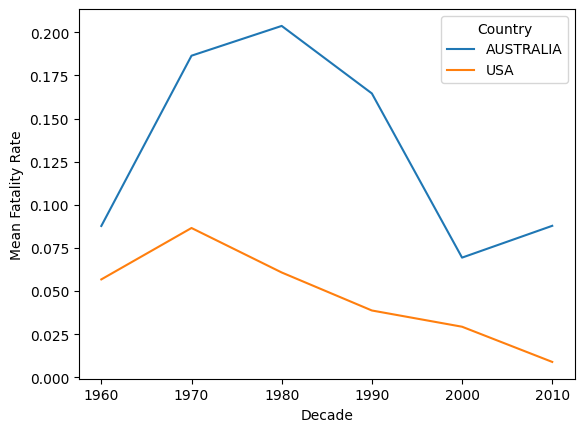

In [87]:
import matplotlib.pyplot as plt
fatality_decade = sns.lineplot(data=decades_fatality_stats, x='converted_decade', y='mean', hue='Country')
plt.xlabel('Decade')
plt.ylabel('Mean Fatality Rate')
plt.show(fatality_decade)

In [88]:
decades_1900_on = [1900+x*10 for x in range(13)]
decades_1900_on

[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [89]:
sharks_usa_australia_year_1900['Decade'] = pd.cut(sharks_usa_australia_year_1900['Year'], bins=decades_1900_on)
decades_fatality_stats_1900 = sharks_usa_australia_year_1900.groupby(['Country', 'Decade']).agg(total_cases=('total_cases', 'sum'), fatal_cases=('fatal_cases', 'sum')).reset_index()
decades_fatality_stats_1900['mean'] = decades_fatality_stats_1900['fatal_cases'] / decades_fatality_stats_1900['total_cases']
decades_fatality_stats_1900['converted_decade'] = decades_fatality_stats_1900['Decade'].map(lambda x:int(str(x)[1:5]))

C:\Users\alexa\AppData\Local\Temp\ipykernel_27500\2306761520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sharks_usa_australia_year_1900['Decade'] = pd.cut(sharks_usa_australia_year_1900['Year'], bins=decades_1900_on)


In [90]:
sharks_usa_australia_year_1900

,Country,Year,fatal_cases,total_cases,fatality_rate,Decade
64,AUSTRALIA,1901.0,1,2,0.500000,"(1900, 1910]"
65,AUSTRALIA,1902.0,2,3,0.666667,"(1900, 1910]"
66,AUSTRALIA,1903.0,4,4,1.000000,"(1900, 1910]"
67,AUSTRALIA,1904.0,1,1,1.000000,"(1900, 1910]"
68,AUSTRALIA,1905.0,1,6,0.166667,"(1900, 1910]"
...,...,...,...,...,...,...
357,USA,2014.0,0,66,0.000000,"(2010, 2020]"
358,USA,2015.0,1,73,0.013699,"(2010, 2020]"
359,USA,2016.0,0,64,0.000000,"(2010, 2020]"
360,USA,2017.0,0,65,0.000000,"(2010, 2020]"


In [91]:
decades_fatality_stats_1900

,Country,Decade,total_cases,fatal_cases,mean,converted_decade
0,AUSTRALIA,"(1900, 1910]",35,20,0.571429,1900
1,AUSTRALIA,"(1910, 1920]",49,16,0.326531,1910
2,AUSTRALIA,"(1920, 1930]",98,40,0.408163,1920
3,AUSTRALIA,"(1930, 1940]",131,34,0.259542,1930
4,AUSTRALIA,"(1940, 1950]",77,18,0.233766,1940
5,AUSTRALIA,"(1950, 1960]",104,15,0.144231,1950
6,AUSTRALIA,"(1960, 1970]",114,10,0.087719,1960
7,AUSTRALIA,"(1970, 1980]",59,11,0.186441,1970
8,AUSTRALIA,"(1980, 1990]",54,11,0.203704,1980
9,AUSTRALIA,"(1990, 2000]",79,13,0.164557,1990


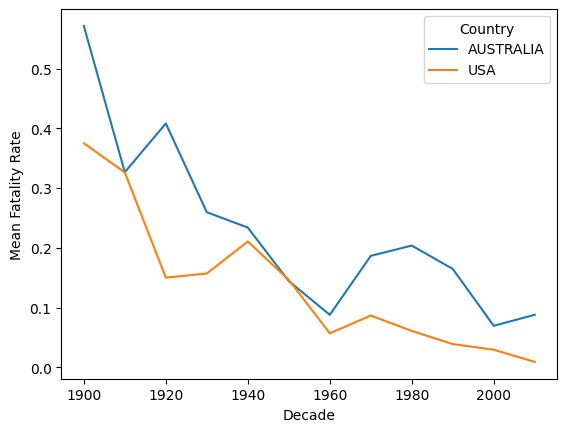

In [92]:
fatality_decade_1900 = sns.lineplot(data=decades_fatality_stats_1900, x='converted_decade', y='mean', hue='Country')
plt.xlabel('Decade')
plt.ylabel('Mean Fatality Rate')
plt.show(fatality_decade_1900)

# Analysing Species

## Additional Cleaning

In [94]:
sharks['Species'].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   88
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [95]:
import re
pattern = '\w+\s+shark'
sharks['Simplified Species'] = sharks['Species'].map(lambda x: ', '.join(re.findall(pattern, x.lower())) if (isinstance(x, str) and len(re.findall(pattern, x.lower())) > 0) else np.nan)

In [96]:
sharks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Fatality,Simplified Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",0,white shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",0,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",0,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",0,m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,0,tiger shark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",1,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",1,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",1,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",1,NaN


## Analysis

In [97]:
sharks['Simplified Species'].unique()

array(['white shark', nan, 'm shark', 'tiger shark', 'lemon shark',
       'bull shark', 'reef shark', 'nurse shark', 'wobbegong shark',
       'blacktip shark', 'a shark', 'galapagos shark', '2m shark',
       'small shark', 'blue shark', 'cookiecutter shark', 'spinner shark',
       'whitetip shark', 'sandtiger shark', 'no shark', 'gill shark',
       '3m shark', 'sevengill shark', 'angel shark', 'dogfish shark',
       'mako shark', 'whaler shark', 'silky shark', 'juvenile shark',
       'hammerhead shark', 'but shark', 'foot shark',
       'white shark, whitetip shark', 'raggedtooth shark', 'goblin shark',
       'spinner shark, blacktip shark', 'metre shark', 'sandbar shark',
       'cow shark', '1m shark', 'salmon shark', 'porbeagle shark',
       'blue shark, blue shark', 'jackson shark', 'zambesi shark',
       '30kg shark', 'thresher shark', 'whale shark', 'kg shark',
       'cutter shark', 'dusky shark', 'bull shark, reef shark',
       'white shark, gill shark', 'smoothhound

In [98]:
sharks['Simplified Species'].value_counts()

white shark                    622
tiger shark                    258
bull shark                     170
m shark                        127
nurse shark                     96
                              ... 
young shark                      1
whitetip shark, white shark      1
soupfin shark                    1
dusky shark, blackfin shark      1
tipped shark                     1
Name: Simplified Species, Length: 147, dtype: int64

In [99]:
sharks['Simplified Species'].value_counts()

white shark                    622
tiger shark                    258
bull shark                     170
m shark                        127
nurse shark                     96
                              ... 
young shark                      1
whitetip shark, white shark      1
soupfin shark                    1
dusky shark, blackfin shark      1
tipped shark                     1
Name: Simplified Species, Length: 147, dtype: int64

In [100]:
fatalities_by_species = sharks.groupby('Simplified Species')['Fatality'].agg(total_cases='count', fatal_cases='sum').reset_index()

In [101]:
fatalities_by_species['mean'] = fatalities_by_species['fatal_cases'] / fatalities_by_species['total_cases']

In [102]:
fatalities_by_species[fatalities_by_species['total_cases'] > 10].sort_values(by='mean', ascending=False)

,Simplified Species,total_cases,fatal_cases,mean
145,zambesi shark,29,9,0.310345
119,tiger shark,258,68,0.263566
128,white shark,622,141,0.226688
28,bull shark,170,35,0.205882
140,whitetip shark,21,4,0.190476
22,blue shark,38,7,0.184211
71,lb shark,18,3,0.166667
80,m shark,127,12,0.094488
126,whaler shark,66,5,0.075758
63,hammerhead shark,43,2,0.046512


Podemos verificar que a fatalidade dos casos de ataque de tubarão tigre e tubarão branco são significativas, em especial porque temos uma boa quantidade de casos registrados de ataques dos mesmos. Isto é, não só são tubarões que atacam mais do que os outros, mas também tem uma taxa significativa de fatalidade.

## Records by Species in USA and Australia

In [104]:
sharks.groupby(['Country', 'Simplified Species']).count()

Case Number  Date  Year  Type  \
Country                    Simplified Species                                  
 TONGA                     reef shark                    1     1     1     1   
                           small shark                   1     1     1     1   
AMERICAN SAMOA             blue shark                    1     1     1     1   
                           tiger shark                   1     1     1     1   
ANDAMAN / NICOBAR ISLANDAS blue shark                    1     1     1     1   
...                                                    ...   ...   ...   ...   
VENEZUELA                  mako shark                    1     1     1     1   
VIETNAM                    30kg shark                    2     2     2     2   
                           m shark                       1     1     1     1   
                           white shark                   1     1     1     1   
WESTERN SAMOA              tiger shark                   1     1     1     1   

                                               Area  Location  Activity  Name  \
Country                    Simplified Species                                   
 TONGA                     reef shark             1         1         1     1   
                           small shark            1         1         1     1   
AMERICAN SAMOA             blue shark             1         1         1     1   
                           tiger shark            1         1         1     1   
ANDAMAN / NICOBAR ISLANDAS blue shark             0         0         1     1   
...                                             ...       ...       ...   ...   
VENEZUELA                  mako shark             1         1         1     1   
VIETNAM                    30kg shark             2         2         2     2   
                           m shark                1         1         1     1   
                           white shark            0         0         1     1   
WESTERN SAMOA              tiger shark            1         1         1     1   

                                               Sex  Age  Injury  Fatal (Y/N)  \
Country                    Simplified Species                                  
 TONGA                     reef shark            1    1       1            1   
                           small shark           1    0       1            1   
AMERICAN SAMOA             blue shark            1    1       1            1   
                           tiger shark           1    1       1            1   
ANDAMAN / NICOBAR ISLANDAS blue shark            1    1       1            1   
...                                            ...  ...     ...          ...   
VENEZUELA                  mako shark            1    1       1            1   
VIETNAM                    30kg shark            2    2       2            2   
                           m shark               1    1       1            1   
                           white shark           1    0       1            1   
WESTERN SAMOA              tiger shark           1    1       1            1   

                                               Time  Species  \
Country                    Simplified Species                  
 TONGA                     reef shark             0        1   
                           small shark            0        1   
AMERICAN SAMOA             blue shark             1        1   
                           tiger shark            1        1   
ANDAMAN / NICOBAR ISLANDAS blue shark             1        1   
...                                             ...      ...   
VENEZUELA                  mako shark             1        1   
VIETNAM                    30kg shark             2        2   
                           m shark                1        1   
                           white shark            0        1   
WESTERN SAMOA              tiger shark            0        1   

                                               Investigator or Source  \
Count

# Extra

The following code was used to facilitate the display of the table in GitHub.

In [ ]:
print(decades_fatality_stats.sort_values(by='converted_decade')[['converted_decade', 'Country', 'total_cases', 'fatal_cases', 'mean']].to_html(index=False))